# Pytorch 60 Minutes Blitz


## Tensors Intro


In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

or from numpy array


In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

or another tensor


In [4]:
x_one = torch.ones_like(x_data)
print(x_one)
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.1836, 0.8728],
        [0.7352, 0.2537]])


use a tuple to give the shape of a tensor


In [5]:
shape = (2,3,2)
rand_ten = torch.rand(shape)
ones_ten = torch.ones(shape)
zeros_ten = torch.zeros(shape)

print(rand_ten)
print(ones_ten)
print(zeros_ten)

tensor([[[0.4995, 0.3250],
         [0.4830, 0.8924],
         [0.2222, 0.6202]],

        [[0.2328, 0.0451],
         [0.3230, 0.6107],
         [0.4997, 0.1614]]])
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])


In [6]:
tensor = torch.rand(3,4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


### USE GPU

if possible


if torch.cuda.is_a


In [7]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor: {tensor.device}")
else:
   print(f"Device tensor: {tensor.device}")


Device tensor: cpu


## Tensor manipulation


In [8]:
t1 = torch.ones(4,4)
t2 = torch.zeros(4,4)

t3 = torch.cat([t1, t2], dim=1)

print(f"Concatinating: \n",t3)

t4 = t1.matmul(t2)
print("Matmul: \n",t4)

t5 = torch.rand(4,4)
print("Random: \n", t5)
print("Transpose: \n", t5.T)

t6 = t4.add_(2)
print("Adding: \n", t6)

Concatinating: 
 tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])
Matmul: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Random: 
 tensor([[0.7748, 0.3528, 0.0493, 0.4081],
        [0.3812, 0.5243, 0.0153, 0.5266],
        [0.2476, 0.1180, 0.9836, 0.5544],
        [0.1568, 0.4982, 0.0697, 0.8612]])
Transpose: 
 tensor([[0.7748, 0.3812, 0.2476, 0.1568],
        [0.3528, 0.5243, 0.1180, 0.4982],
        [0.0493, 0.0153, 0.9836, 0.0697],
        [0.4081, 0.5266, 0.5544, 0.8612]])
Adding: 
 tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])


# A gentle Introduction to $torch.autograd$


In [9]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)

In [10]:
prediction = model(data)

In [11]:
indiLoss = (prediction - labels)
loss = (prediction - labels).sum()
loss.backward()

In [12]:
from matplotlib import pyplot as plt

In [13]:
print(indiLoss.shape)

torch.Size([1, 1000])


In [14]:
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optim.step()

In [15]:
print(optim)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [16]:
a = torch.tensor([2.,3.], requires_grad=True)
b = torch.tensor([6.,4.], requires_grad=True)

Q = 3*a**3 - b**2


In [17]:
external_grad = torch.tensor([1.,1.])
Q.backward(gradient=external_grad)

In [18]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [19]:
from torch import nn, optim
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# freeze all parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [20]:
model.fc = nn.Linear(512, 10)

In [21]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Neural Networks


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = Net()

print(model)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
params = list(model.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [24]:
input = torch.randn(1,1,32,32)
print(input)

tensor([[[[-1.4204, -1.4527,  2.5457,  ..., -0.2540, -0.1582, -1.8505],
          [ 0.7414,  2.0546, -0.8055,  ...,  1.1033,  1.6235, -0.1258],
          [-0.6869,  1.5954,  1.1525,  ...,  0.1891, -1.9929, -0.1254],
          ...,
          [ 0.6690, -0.6787,  0.9519,  ...,  1.8027,  0.4408,  0.1646],
          [-0.6384,  1.3963, -1.1548,  ..., -0.2117, -1.0554,  1.7214],
          [ 1.0612, -1.3464,  0.7150,  ..., -1.6242,  0.0782,  0.7963]]]])


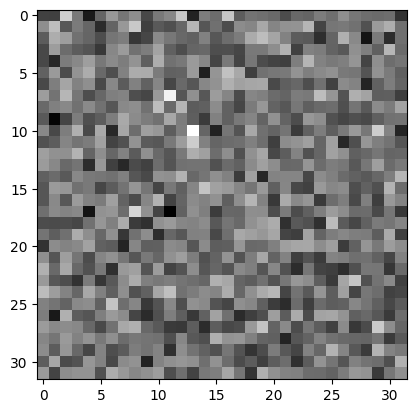

In [25]:
# show the image input
plt.imshow(input[0][0], cmap='gray')

In [26]:
output = model(input)
print(output)
print(output.size())


tensor([[ 0.0304,  0.0181,  0.0009,  0.0244, -0.0702,  0.0612,  0.0651, -0.0452,
         -0.1033,  0.0725]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


In [27]:
model.zero_grad()
output.backward(torch.randn(1,10))

In [28]:
# Unsqueeze

input = torch.randn(1,1,32,32)
print(input)

output = model(input)
print(output)
print(output.size())

tensor([[[[ 1.3046,  0.4151, -1.6548,  ..., -0.0734,  1.8802,  0.7533],
          [ 0.5722, -0.5556,  2.5899,  ...,  0.3473,  0.4282,  0.1774],
          [ 0.2035, -2.1449,  0.2903,  ...,  0.2352,  0.8773, -0.6022],
          ...,
          [-0.3782,  0.4051, -1.0937,  ..., -1.2920, -0.7493, -0.6189],
          [-0.0986,  0.6281,  0.3341,  ..., -0.8876,  0.6602, -0.9084],
          [-0.2035, -0.8141,  0.9334,  ..., -0.8230, -0.1750,  0.1410]]]])
tensor([[ 0.0450,  0.0351,  0.0166,  0.0346, -0.0579,  0.0686,  0.0613, -0.0239,
         -0.0916,  0.0740]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


## Loss Function


In [29]:
output = model(input)
target = torch.randn(10)
print(target)
target = target.view(1,-1)

# nimmt einen Array Nest heraus

print(target)

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor([-0.8149, -1.2577, -0.3487,  1.3848,  0.0684,  0.6062,  0.4158,  0.6253,
        -0.7270,  0.9334])
tensor([[-0.8149, -1.2577, -0.3487,  1.3848,  0.0684,  0.6062,  0.4158,  0.6253,
         -0.7270,  0.9334]])
tensor(0.6361, grad_fn=<MseLossBackward0>)


In [30]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## Backpropagation


In [31]:
model.zero_grad() # set all gradients to zero, otherwise they accumulate

print('conv1.bias.grad before backward')
print(model.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(model.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0033,  0.0113, -0.0101,  0.0051,  0.0022, -0.0024])


## Update the weights


In [32]:
learning_rate = 0.01
for f in model.parameters():
    f.data.sub_(f.grad.data * learning_rate)

# Use Optimizer


In [33]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.01)

# training loop
for _ in range(100):
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, target)
    print(loss)
    loss.backward()
    optimizer.step()

tensor(0.6269, grad_fn=<MseLossBackward0>)
tensor(0.1235, grad_fn=<MseLossBackward0>)
tensor(0.3869, grad_fn=<MseLossBackward0>)
tensor(0.2962, grad_fn=<MseLossBackward0>)
tensor(0.1803, grad_fn=<MseLossBackward0>)
tensor(0.0603, grad_fn=<MseLossBackward0>)
tensor(0.0365, grad_fn=<MseLossBackward0>)
tensor(0.0168, grad_fn=<MseLossBackward0>)
tensor(0.0266, grad_fn=<MseLossBackward0>)
tensor(0.0252, grad_fn=<MseLossBackward0>)
tensor(0.0167, grad_fn=<MseLossBackward0>)
tensor(0.0291, grad_fn=<MseLossBackward0>)
tensor(0.0144, grad_fn=<MseLossBackward0>)
tensor(0.0180, grad_fn=<MseLossBackward0>)
tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.0080, grad_fn=<MseLossBackward0>)
tensor(0.0086, grad_fn=<MseLossBackward0>)
tensor(0.0027, grad_fn=<MseLossBackward0>)
tensor(0.0076, grad_fn=<MseLossBackward0>)
tensor(0.0021, grad_fn=<MseLossBackward0>)
tensor(0.0067, grad_fn=<MseLossBackward0>)
tensor(0.0032, grad_fn=<MseLossBackward0>)
tensor(0.0063, grad_fn=<MseLossBackward0>)
tensor(0.00

# Training a Classifier


In [39]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils.data

In [41]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle = True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


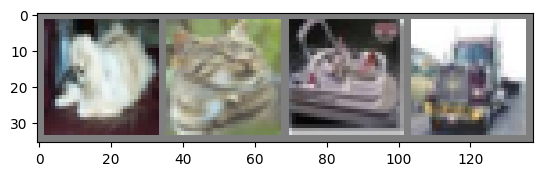

dog   cat   ship  truck


In [43]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [49]:
# show the dimensions of the images

AttributeError: 'tuple' object has no attribute 'shape'

In [ ]:
# Now Lets build a CNN 

import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conf1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Network()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr =0.001, momentum=0.9)